In [1]:
from math import fabs

from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

# compas
from compas.geometry import Polyline

from compas.geometry import add_vectors

# static equilibrium
from jax_fdm.datastructures import FDNetwork
from jax_fdm.equilibrium import fdm

In [2]:
def pretty_matplotlib():
    
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size=30)  # 24
    plt.rc('axes', linewidth=1.5, labelsize=22) # 22
    plt.rc('xtick', labelsize=24, direction="in")
    plt.rc('ytick', labelsize=24, direction="in")
    # plt.rc('legend', fontsize=12)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

    # tick settings
    plt.rc('xtick.major', size=10, pad=4)
    plt.rc('xtick.minor', size=5, pad=4)
    plt.rc('ytick.major', size=10)
    plt.rc('ytick.minor', size=5)

    
def create_figure(figsize, dpi):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    return fig


def plot_xy(x, y, label, lw=2.0, alpha=1.0, linestyle=None, marker="o", marker_kwargs=None, color=None):
    marker_kwargs = marker_kwargs or {}
    return plt.plot(x, y, label=label, lw=lw, alpha=alpha, ls=linestyle, marker=marker, color=color, **marker_kwargs)
    
    
def save_figure(filename, extension="pdf", box_inches="tight", pad_inches=0.05, sleeptime=1.0):
    path = f"{filename}.{extension}"
    plt.savefig(path, bbox_inches='tight', pad_inches=pad_inches)
    print(f"Saved image to {path}")
    # sleep(sleeptime)
    
    
def show_figure():
    plt.show()

    
def decorate_figure(xlabel, ylabel, xticks, yticks, ylabelpad=None, xscale="linear", yscale="linear", linthresh=0.1, legend=True, legend_loc="best", legend_fontsize="small", grid=True, grid_kwargs={}, tight=True):
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, labelpad=ylabelpad)
    
    
    if xscale == "symlog":
        plt.xscale(xscale, linthresh=linthresh)
    else:
        plt.xscale(xscale)

    if yscale == "symlog":
        plt.yscale(yscale, linthresh=linthresh)
    else:
        plt.yscale(yscale)
    
    # Enable minor ticks on the y-axis
    plt.xticks(xticks) #, labels=xticks)
    plt.yticks(yticks)#, labels=yticks)

    # plt.minorticks_on()

    if grid:
        plt.grid(**grid_kwargs)
    
    if legend:
        plt.legend(fontsize=legend_fontsize, loc=legend_loc)
        
    if tight:
        plt.tight_layout()
        

def normalized_color(color):
    return tuple([c / 255.0 for c in (color)])

In [5]:
# ==========================================================================
# Initial parameters
# ==========================================================================

filenames = [
    ("MEM", "netdeck_3d_integrated_targetforce10_loss"),
    ("FDM", "netdeck_3d_fdm_loss"),
    ("CEM/FDM", "netdeck_3d_separated_loss"),
    ]

experiment_data = {}
    
for label, filename in filenames:
    with open(f'{filename}.txt', 'r') as file:
        lines = file.readlines()

    loss_vals = []
    for line in lines:
        loss_vals.append(float(line.strip()))

    experiment_data[label] = loss_vals

Saved image to netdeck_3d_plot.pdf


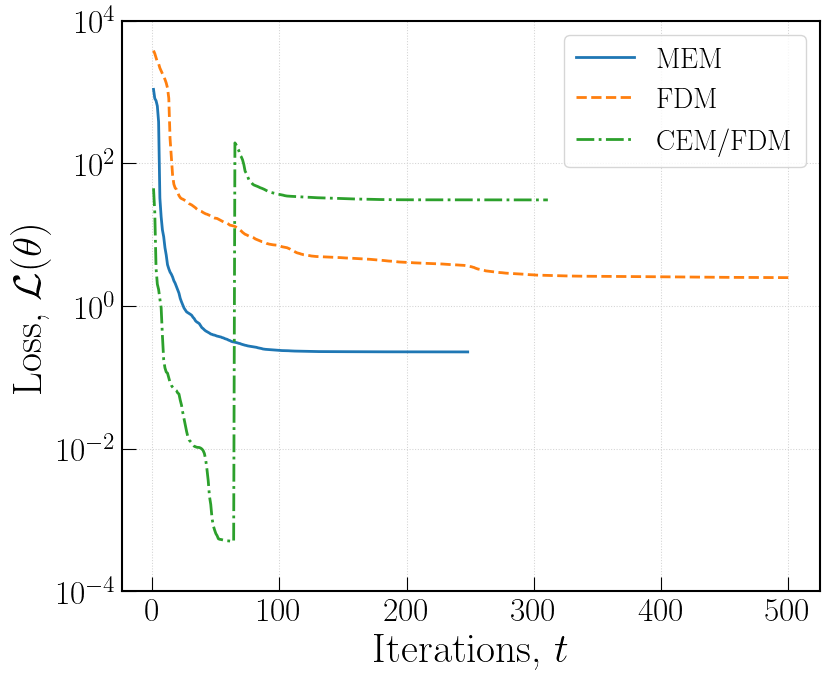

In [8]:
# ==========================================================================
# Visualization
# ==========================================================================

save_fig = True

marker_kwargs = {'markersize': 6,
                 'markerfacecolor': 'w',
                 'markeredgewidth': 1.0,
                 'markeredgecolor': (0, 0, 0, 1)}

grid_kwargs = {'which': 'major',
               'axis': 'both',
               'color': 'lightgray',
               'linestyle': 'dotted',
               'linewidth': 0.75}

pretty_matplotlib()

fig = plt.figure(figsize=(9, 7.5), dpi=100)

ls = {"CEM/FDM": "dashdot", "MEM": "-", "FDM": "--"}
ylabel = r"Loss, $\mathcal{L}(\theta)$"
xlabel = r"Iterations, $t$"

for name, values in experiment_data.items():

    # color= "black"
        
    qs_signed = np.array(list(range(1, len(values) + 1)))
    ys_max = np.array(list(values))
    
    line = plt.plot(qs_signed,
                    ys_max,
                    linewidth=2.0,
                    ls=ls[name],
                    # color=color,                        
                    label=name                        
                    )

# xticks = [0, 2, 4, 6, 8, 10, 12, 14]
yticks = [0.0001, 0.01, 1, 100, 10000]

# plt.ylim(-1, 22.0)
# plt.xlim(-1, 15.0)

decorate_figure(xlabel,
                ylabel,
                xticks=None, # xticks,
                yticks=yticks,
                ylabelpad=None,
                xscale="linear",
                yscale="log",  # linear, symlog
                legend=True,
                legend_loc="upper right",  # legend_loc="lower right",
                legend_fontsize="x-small",  # small, x-small, xx-small
                grid=True,
                grid_kwargs=grid_kwargs,
                tight=True)

if save_fig:
    save_figure("netdeck_3d_plot",
                extension="pdf",
                box_inches="tight",
                pad_inches=0.05)

plt.show()